<a href="https://colab.research.google.com/github/Nuthan03/NN_Classification/blob/main/NN_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:
* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

A few types of classification problems:

*   Binary classification
*   Multiclass clasification
*   Multilabel classification



## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


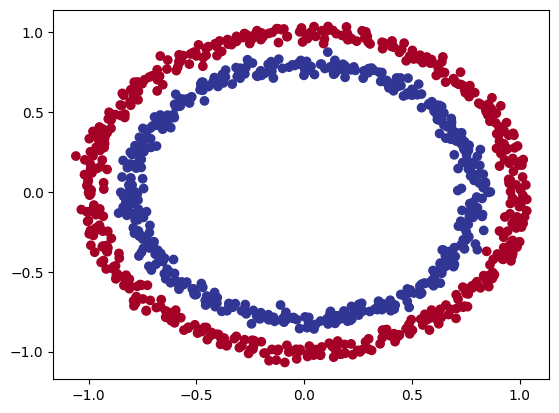

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

In [ ]:
import tensorflow as tf


In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.3427 - accuracy: 0.5030
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2308 - accuracy: 0.5230
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 3.9989 - accuracy: 0.5200
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.6065 - accuracy: 0.4690
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.4058 - accuracy: 0.4670


In [ ]:
model.fit(x, y, epochs=200, verbose=0)
model.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model.fit(x, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 4.3629 - accuracy: 0.5000


[4.3629469871521, 0.5]

## Improving our model

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5070


[0.6983543038368225, 0.5070000290870667]

In [ ]:
import numpy as np

In [ ]:

def plot_dicision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stacks 2D arrays together

  # Make prediction using the trained model
  y_preds = model.predict(x_in)

  # Check for multiclass
  if model.output_shape[-1] > 1: # Checks the final dimension of the model's output_shape
    print("doing multi-class classfication")
    # We have to reshape our predictions to get them ready for plotting
    y_preds = np.argmax(y_preds, axis=1).reshape(xx.shape)
  else:
    print("doing binary classfication")
    y_preds = np.round(np.max(y_preds, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_preds, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classfication


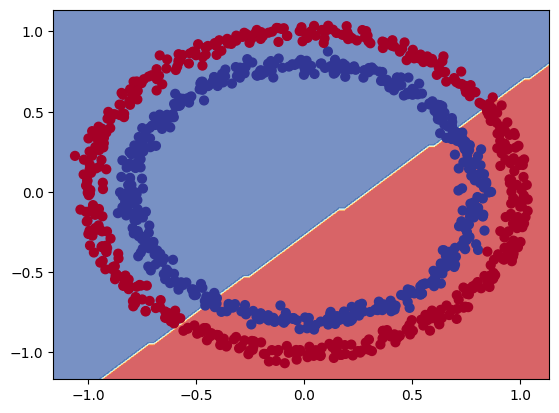

In [ ]:
plot_dicision_boundary(model_3, x, y)

In [ ]:
# Let's see if we can use our model can be used for a regression problem

tf.random.set_seed(42)

x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split the data into train and test split
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model
model_3.fit(x_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 627.6775 - mae: 627.6775
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 506.7316 - mae: 506.7316
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 391.9994 - mae: 391.9994
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 274.4798 - mae: 274.4798
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 153.5654 - mae: 153.5654
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 53.0368 - mae: 53.0368
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 82.1632 - mae: 82.1632
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 77.9632 - mae: 77.9632
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 49.8944 - mae: 49.8944
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 51.4169 - mae: 51.4169
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 6ms/step


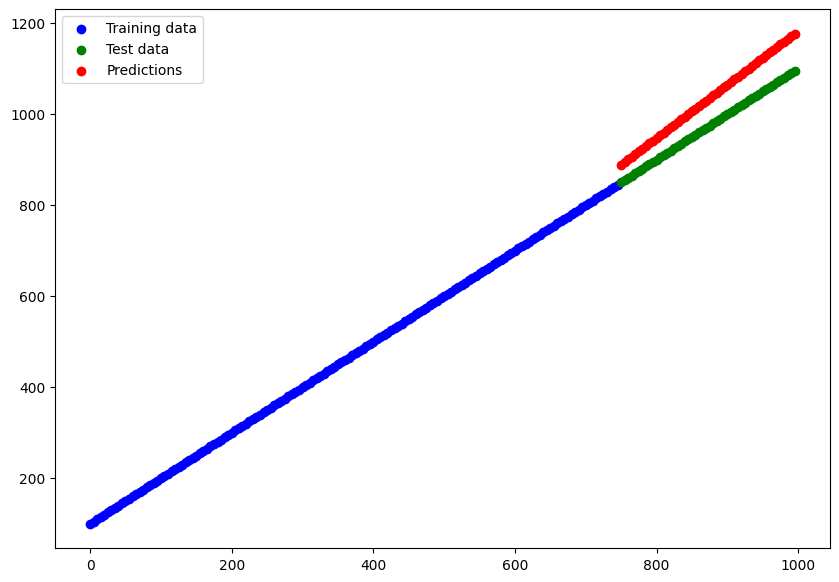

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(x_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(x_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## Non-linearity  

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(tf.expand_dims(x, axis=1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2872 - accuracy: 0.4938
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1915 - accuracy: 0.4973
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1877 - accuracy: 0.4966
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1490 - accuracy: 0.4994
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1174 - accuracy: 0.5018
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0459 - accuracy: 0.4983
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0086 - accuracy: 0.4996
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9851 - accuracy: 0.4973
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9056 - accuracy: 0.4993
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8704 - accuracy: 0.5017
Epoch 11/

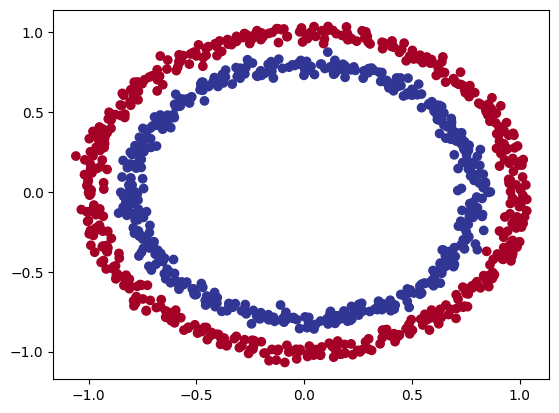

In [ ]:
# Check out our data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classfication


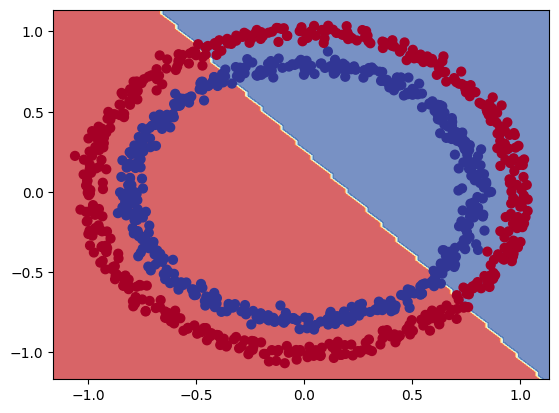

In [ ]:
# Check the predictions for our latest model
plot_dicision_boundary(model_4, x, y)

In [ ]:
tf.random.set_seed(42)

model_5 =tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_5.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.9126 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6973 - accuracy: 0.4770
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6164 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5817 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5721 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5308 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4987 - accuracy: 0.4710
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4861 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4813 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4676 - accuracy: 0.4720
Epoch 11/

In [ ]:
# Time to replicate the multi-layer neural network from TesorFlow playground

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


history = model_6.fit(x, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classfication


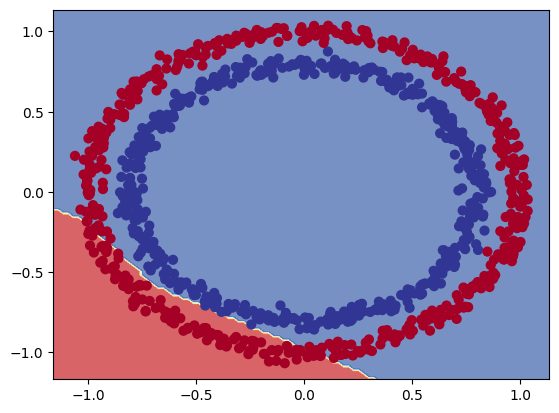

In [ ]:
# Let's look at how our model did
plot_dicision_boundary(model_6, x, y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_7.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6915 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5080
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5250
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5400
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5550
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6260
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6390
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5920
Epoch 11/

In [ ]:
# Evaluate the model
model_7.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.9790


[0.2555626630783081, 0.9789999723434448]

313/313 [==============================] - 0s 1ms/step
doing binary classfication


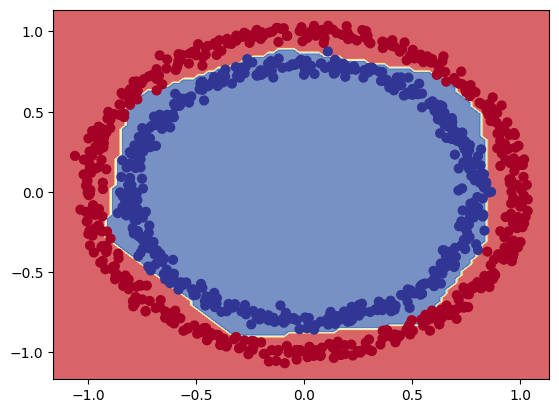

In [ ]:
plot_dicision_boundary(model_7, x, y)

In [ ]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

Let's plot it

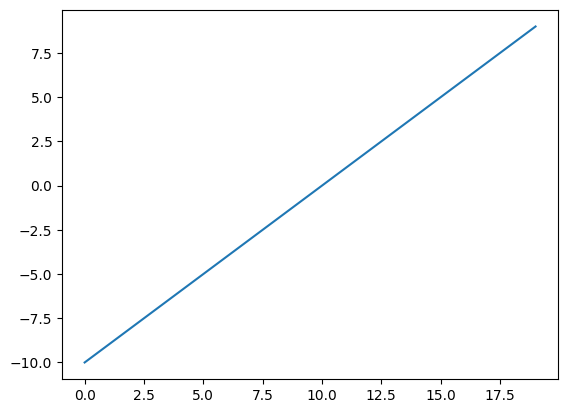

In [ ]:
plt.plot(A);

 now let's recreate the sigmoid function and see what it does to our data. You can also find a pre-built sigmoid function at tf.keras.activations.sigmoid.

In [ ]:
# Sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tesor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

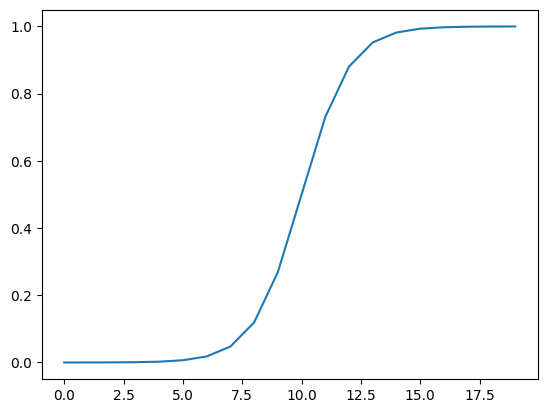

In [ ]:
plt.plot(sigmoid(A));

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

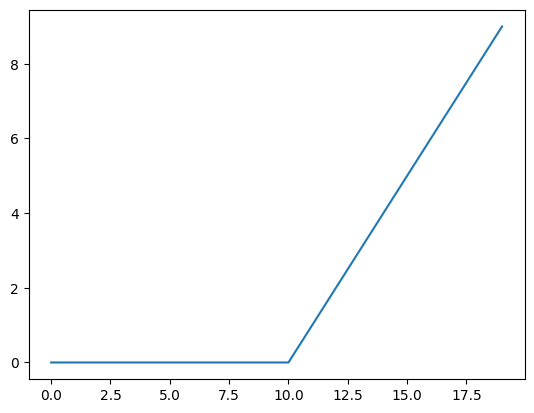

In [ ]:
plt.plot(relu(A));

In [ ]:
# Let's try the linera activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

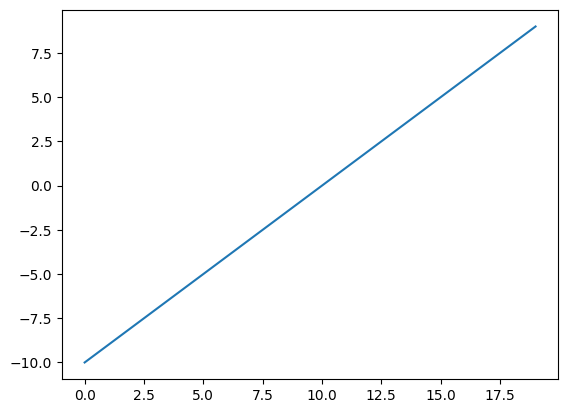

In [ ]:
plt.plot(tf.keras.activations.linear(A));

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classfication

So far we have been training and testing on the same dataset
in machine learning this basically a sin
So let's create a training and test set

In [ ]:
# Check how many examples we have

len(x)

1000

In [ ]:
x_train , y_train = x[:800], y[:800]
x_test , y_test = x[800:], y[800:]

# Check the shape of the data
x_train.shape, x_test.shape

((800, 2), (200, 2))

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6900 - accuracy: 0.5100
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5275
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5575
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6771 - accuracy: 0.5938
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.5987
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.5738
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.6150
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.5975
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.7150
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5959 - accuracy: 0.6787
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.9900


[0.0846400186419487, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classfication
313/313 [==============================] - 0s 1ms/step
doing binary classfication


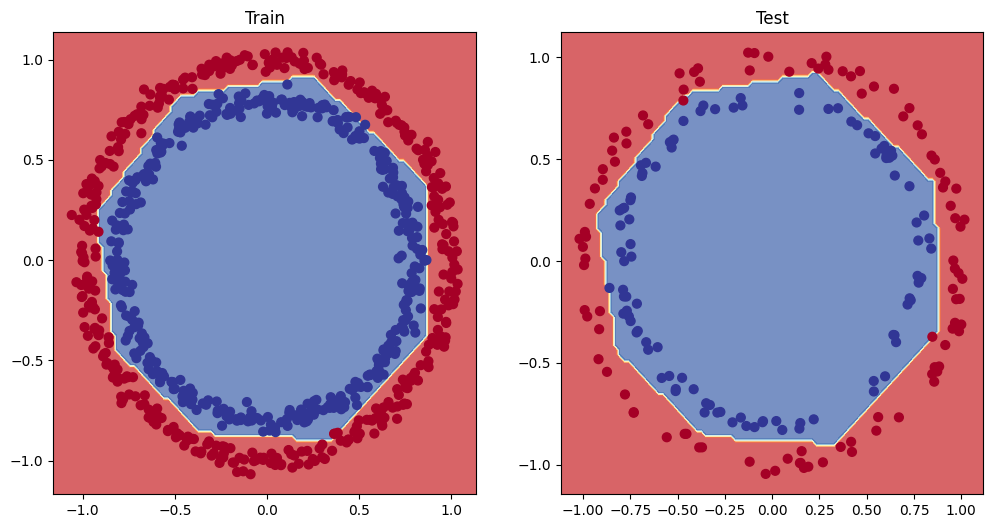

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_dicision_boundary(model_8, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_dicision_boundary(model_8, x=x_test, y=y_test)
plt.show()

## Plot the loss curves

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.690049,0.51000
1,0.686234,0.52750
2,0.681950,0.55750
3,0.677063,0.59375
4,0.671640,0.59875
5,0.664953,0.57375
6,0.654444,0.61500
7,0.646711,0.59750
8,0.627517,0.71500
9,0.595873,0.67875


Text(0.5, 1.0, 'Model_8 loss curves')

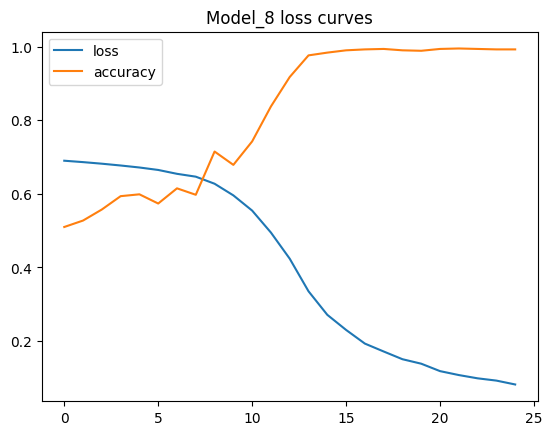

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

## Finding the best learning rate

To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

In [ ]:
from keras.src.optimizers.schedules import learning_rate_schedule
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

learning_rate_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(x_train,
                      y_train,
                      epochs=100,
                      callbacks=[learning_rate_schedule])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7070 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5038 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5038 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

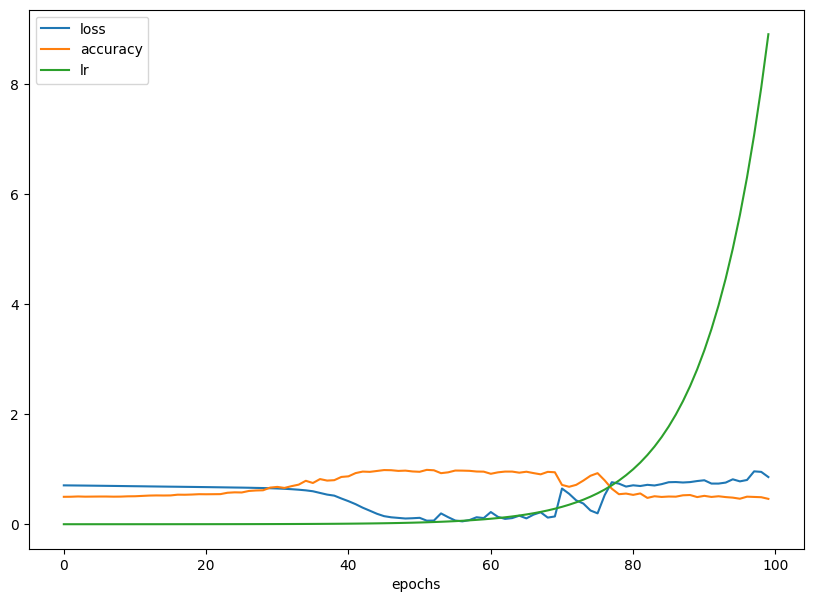

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs loss')

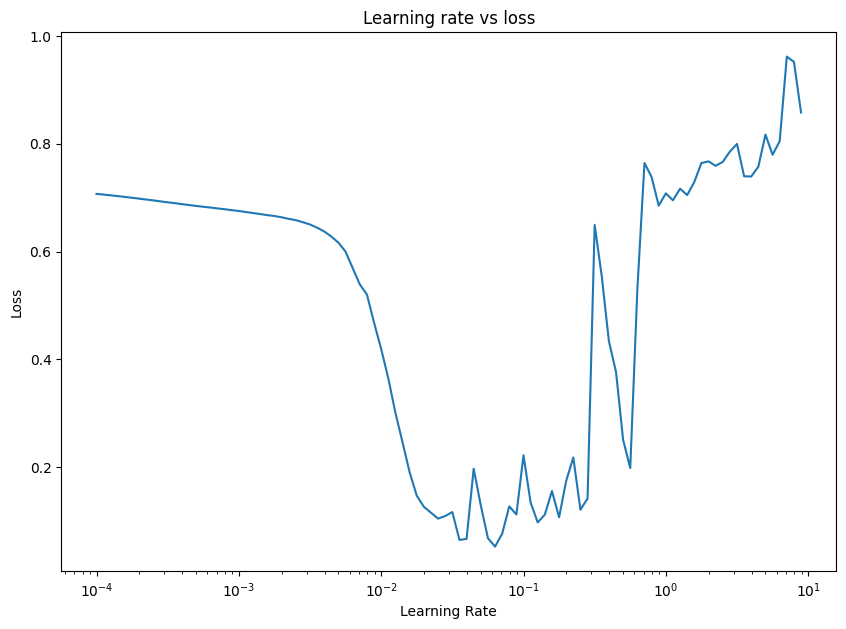

In [ ]:
# Plot the learning rate versus the loss

learning_rate_schedule = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(learning_rate_schedule, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

In [ ]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(x_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6895 - accuracy: 0.5312
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6050
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6725
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.7837
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7925
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8662
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.9187
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.9162
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9513
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.9550


[0.11395084112882614, 0.9549999833106995]

313/313 [==============================] - 0s 1ms/step
doing binary classfication
313/313 [==============================] - 0s 1ms/step
doing binary classfication


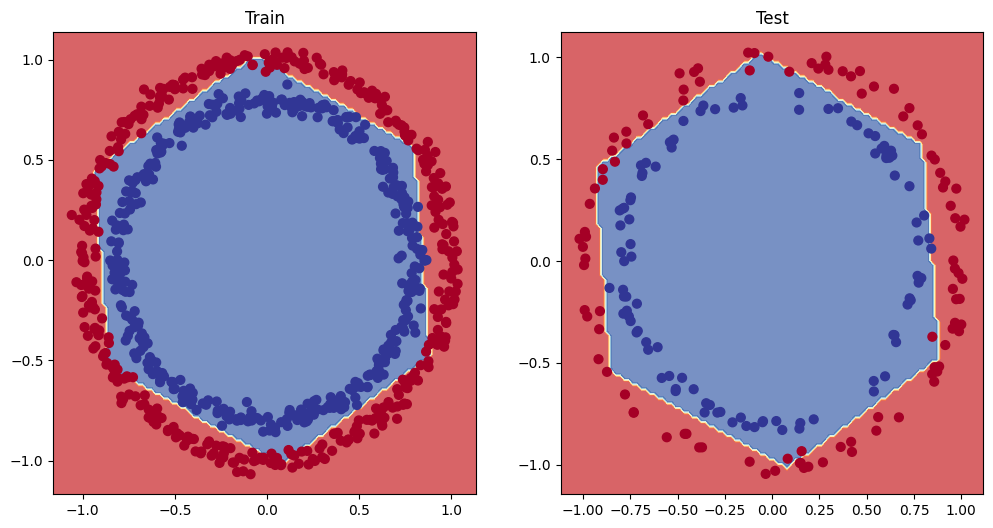

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_dicision_boundary(model_10, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_dicision_boundary(model_10, x=x_test, y=y_test)
plt.show()

## More classfication evaluation methods
Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9550
Model loss on the test set: 0.11395084112882614
Model accuracy on the test set: 95.50%


How about a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(x_test)

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.9968924 ],
       [0.9979746 ],
       [0.9671507 ],
       [0.9989098 ],
       [0.02424085],
       [0.02905876],
       [0.996908  ],
       [0.00531293],
       [0.9558669 ],
       [0.01861901]], dtype=float32)

In [ ]:
# Converting y_preds into 0's and 1's
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[93,  8],
       [ 1, 98]])

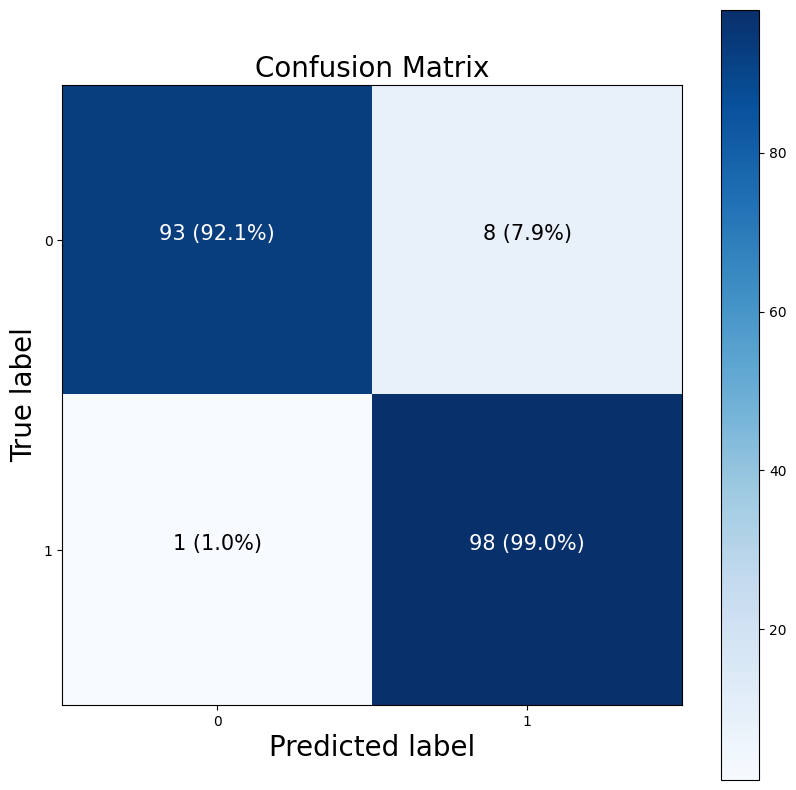

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes =cm.shape[0]

# Prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  label = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to buttom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (Multiclass classfication)

When you have more than two classes as an option, this is known as **multiclass classification**.



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already sorted into training and testing sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

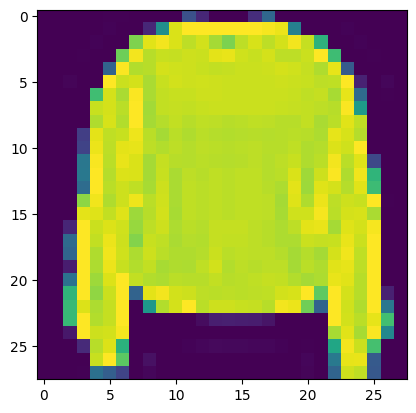

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
train_labels[7]

2

In [ ]:
# Create a small-index
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

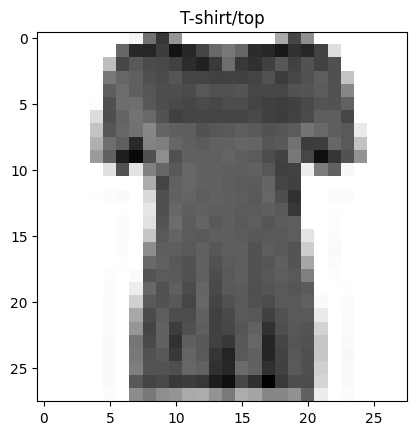

In [ ]:
# Plot an example image and its label
index_of_choice = 10
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

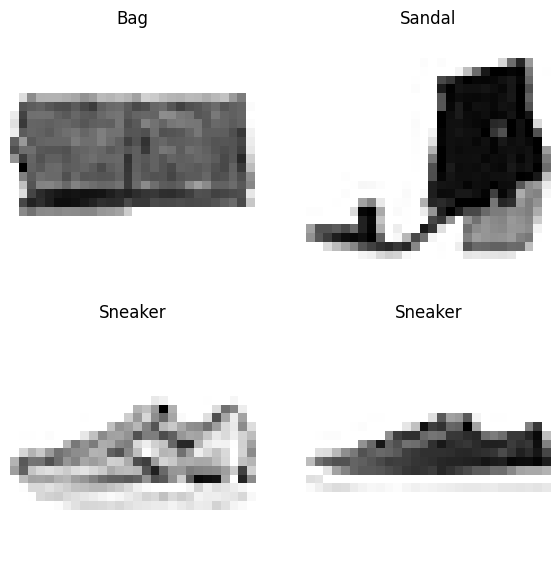

In [ ]:
# Plot multiple random images of fashion MINST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classfication model



In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_model_11 = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.0630 - accuracy: 0.2125 - val_loss: 1.7860 - val_accuracy: 0.2165
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7284 - accuracy: 0.2570 - val_loss: 1.6940 - val_accuracy: 0.2702
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6306 - accuracy: 0.2990 - val_loss: 1.5831 - val_accuracy: 0.3307
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5750 - accuracy: 0.3156 - val_loss: 1.5506 - val_accuracy: 0.3252
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5493 - accuracy: 0.3218 - val_loss: 1.5660 - val_accuracy: 0.3130
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5341 - accuracy: 0.3225 - val_loss: 1.5266 - val_accuracy: 0.3265
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5237 - accuracy: 0.3221 - val_loss: 1.5263 - val_accuracy: